In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #IMPORT LIBRARIES

In [3]:
df=pd.read_csv("/content/wine.csv") #LOADING DATASET

In [6]:
# @title  EDA
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.Type.value_counts()

,count
Type,
2,71
1,59
3,48


In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.isnull().sum() #CHECK NULL VALUES

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

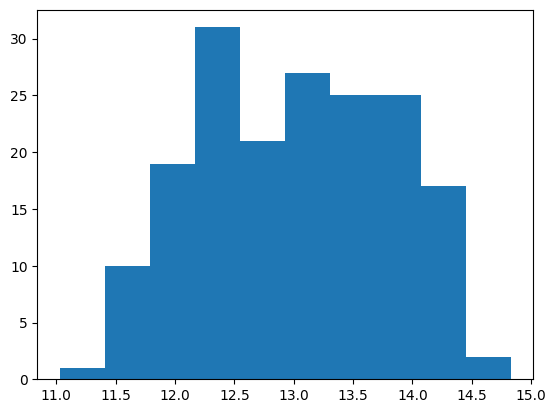

In [10]:
plt.hist(df.Alcohol)  #visualizing using histograms

(array([ 5.,  3., 24., 32., 47., 34., 18., 10.,  2.,  3.]),
 array([10.6 , 12.54, 14.48, 16.42, 18.36, 20.3 , 22.24, 24.18, 26.12,
        28.06, 30.  ]),
 <BarContainer object of 10 artists>)

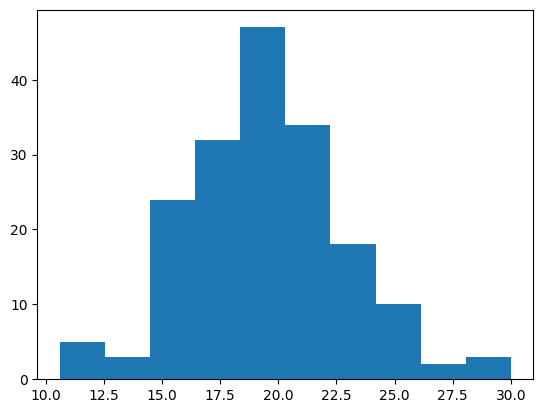

In [11]:
plt.hist(df.Alcalinity)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac92325fca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac92325f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac92325c0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac92325f220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac92325ef80>],
 'means': []}

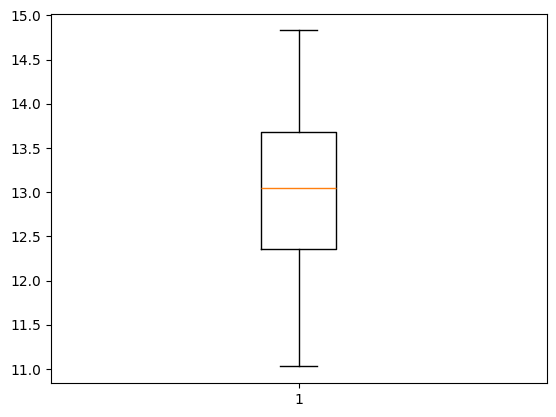

In [12]:
plt.boxplot(df.Alcohol)  #visualizing using box plot,no outliers detected

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac926b028f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac926b02d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac926b02680>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac926b037c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac926b01540>],
 'means': []}

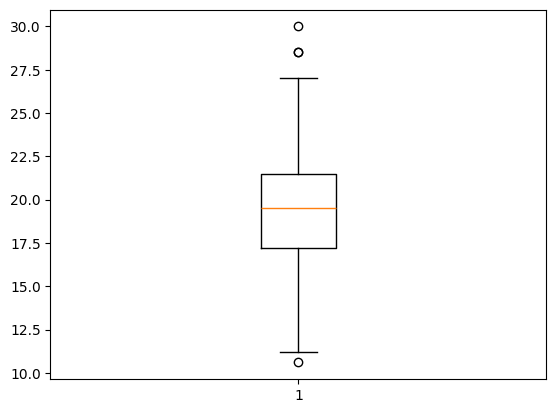

In [13]:
plt.boxplot(df.Alcalinity)  #few outliers detected

<Axes: ylabel='Density'>

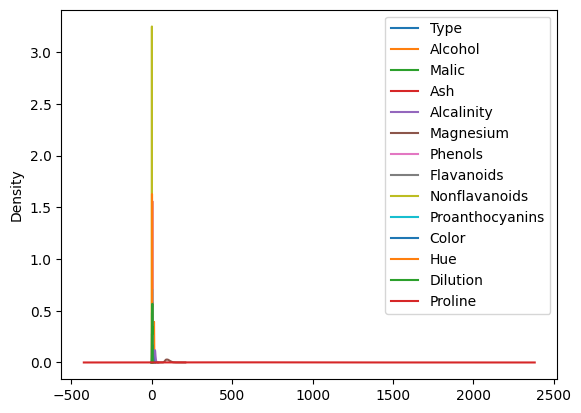

In [14]:
df.plot.density()

In [15]:
df.corr() #OBSERVING CO-RELATION

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

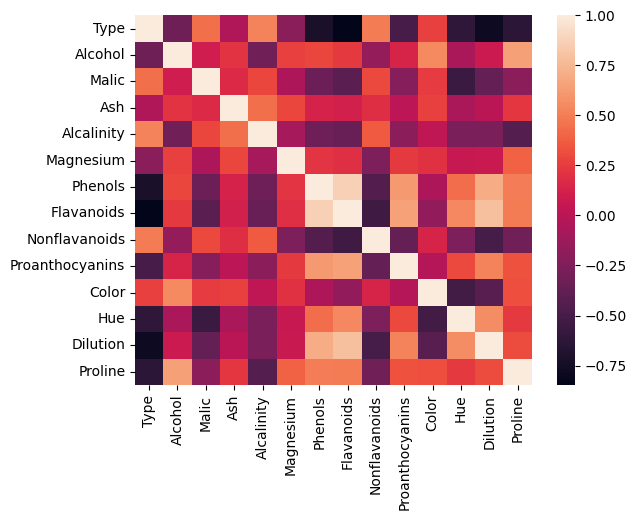

In [16]:
sns.heatmap(df.corr())

In [17]:
# @title DIMENSIONALITY REDUCTION WITH PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df) #applying standarization
df_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
pca=PCA()  #applying pca
pca_component=pca.fit_transform(df_scaled)

In [19]:
var=pca.explained_variance_

The amount of variance that each PCA explains is in percentage

In [20]:
varr=pca.explained_variance_ratio_


In [21]:
var1=np.cumsum(np.round(varr,decimals=4)*100)
var1 #converting it into percentage

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [22]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [ 0.00569041,  0.48416087,  0.22359095,  0.31585588, -0.01161574,
         0.30055143,  0.06711983, -0.00131345,  0.0269887 ,  0.04122256,
         0.52978274, -0.27790735, -0.16277625,  0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

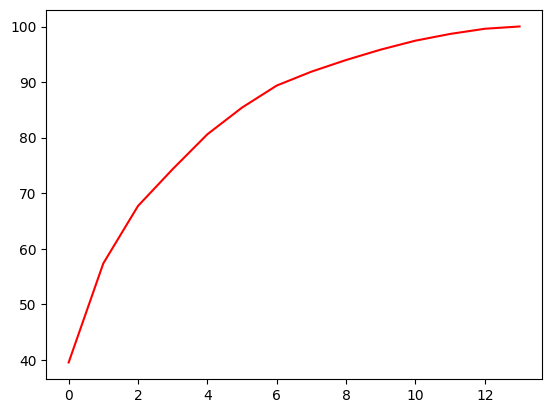

In [23]:
plt.plot(var1, color="red")  #plotting the graph,considering 10 columns will give us 95%

In [24]:
# @title TASK 3-CLUSTERING WITH ORIGINAL data

In [25]:
from sklearn.cluster import KMeans

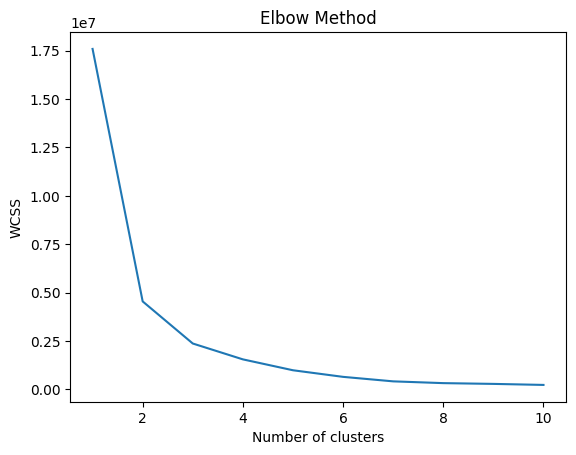

In [26]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia. In WCSS list we will append all distances i.e if cluster is 10 what is the value, if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [28]:
labels=kmeans.labels_


labels

array([0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 3,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 3, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 1, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 0,
       0, 3], dtype=int32)

In [29]:
features=df[['Type','Alcohol']]

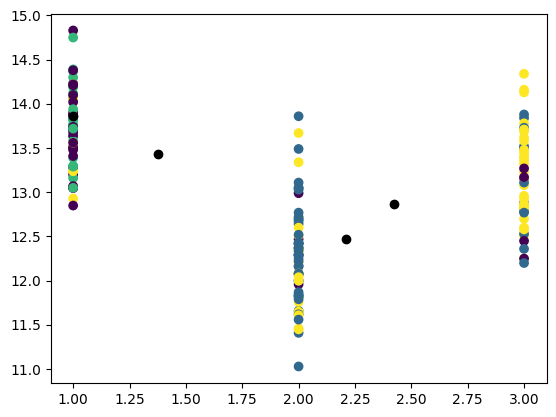

In [30]:
plt.scatter(features['Type'],features['Alcohol'],c=labels)
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color='black')

In [31]:
#now for silhoutte score
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(df,labels)
silhoutte_avg

0.5586869071134494

In [32]:
scaled_df=pd.DataFrame(df_scaled,columns=df.columns) #creating data frame of scaled data and assigning original column names to it

In [33]:
scaled_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [34]:
pca_data=scaled_df.iloc[:,0:10]
pca_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404
...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346


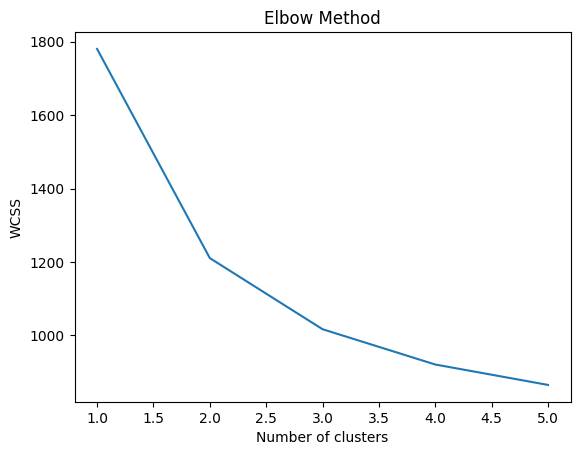

In [35]:
wcsss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1,6):
    kmeanss = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeanss.fit(pca_data) #  use fit method to fit the kmeans object to our scaled dataframe
    wcsss.append(kmeanss.inertia_)# another name for wcss is inertia. In WCSS list we will append all distances i.e if cluster is 10 what is the value, if 9 what is value and so on upto 1.

plt.plot(range(1, 6), wcsss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeanss=KMeans(n_clusters=3)
kmeanss.fit(pca_data)

KMeans(n_clusters=3)

In [37]:
labelss=kmeanss.labels_ #labels
labelss

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [38]:
silhoutte_avgs=silhouette_score(pca_data,labelss)
silhoutte_avgs

0.25471768866430633

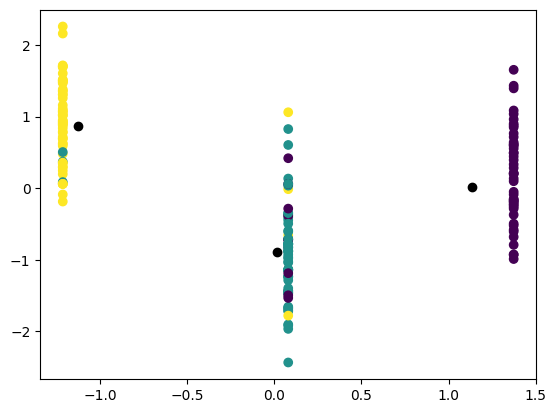

In [39]:
featuress=pca_data[['Type','Alcohol']]


plt.scatter(featuress['Type'],featuress['Alcohol'],c=labelss)
centroidss=kmeanss.cluster_centers_
plt.scatter(centroidss[:,0],centroidss[:,1],color='black')

Cluserting on original data frame was high because of unscaled data which created biases
After standarization we observed all columns having mean of 0 and standard deviation 1
We got silhoutte score of 0.54 and 0.25

In this assignment we got to learn about the important features to consider by gaining maximum accuracy
PCA helps in reducing unnecessary columns and making it easier to understand the data
PCA to consider when we have large no columns with less information
We should consider PCA to reduce dimentionality among the data

In [41]:
#HIERARCHICAL CLUSTERING
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize   # Import Libraries

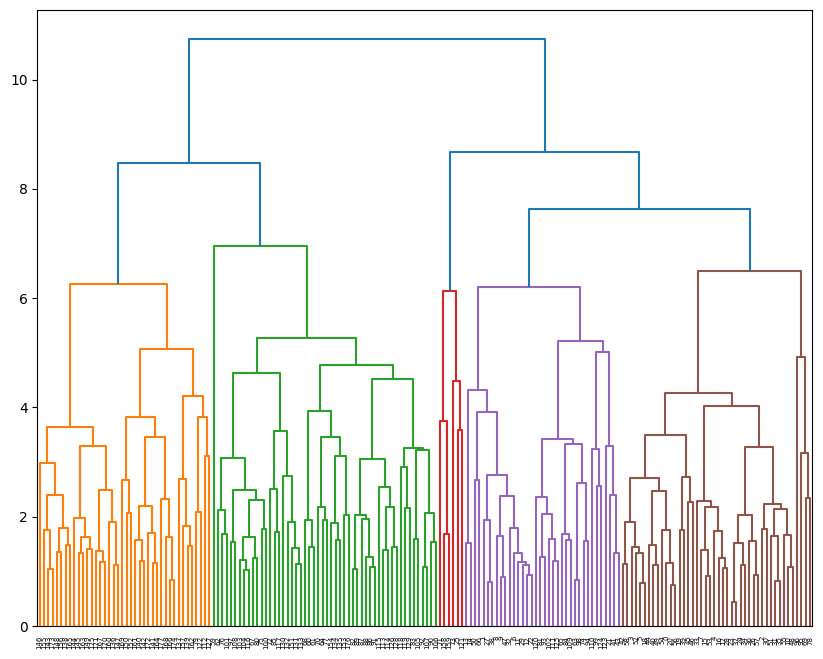

In [42]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(pca_data,'complete'))

In [44]:
# Create Clusters (y)
hclusters = AgglomerativeClustering(n_clusters=3, linkage='ward')
# Removed affinity='euclidean' as it's not needed with linkage='ward'
hclusters

AgglomerativeClustering(n_clusters=3)

In [45]:
y=pd.DataFrame(hclusters.fit_predict(pca_data),columns=['clustersid'])
y['clustersid'].value_counts()

,count
clustersid,
2,64
1,63
0,51


In [ ]:
#THANK YOU!!!!